<a href="https://colab.research.google.com/github/ShreeHarinesh1494/Bharat-Intern-Data-Science/blob/main/Bharat_Intern_Task_3_Dog_Vs_Cat_Classificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle


In [4]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 97% 789M/812M [00:05<00:00, 247MB/s]
100% 812M/812M [00:05<00:00, 155MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg', 'dog.2158.jpg', 'cat.5242.jpg', 'dog.5448.jpg', 'cat.5615.jpg', 'cat.2554.jpg', 'dog.570.jpg', 'dog.1305.jpg', 'dog.4615.jpg', 'cat.8319.jpg', 'cat.5016.jpg', 'dog.9682.jpg', 'dog.3795.jpg', 'cat.11866.jpg', 'cat.12067.jpg', 'dog.1293.jpg', 'dog.261.jpg', 'dog.3155.jpg', 'dog.5077.jpg', 'dog.4678.jpg', 'cat.3869.jpg', 'dog.2143.jpg', 'dog.2048.jpg', 'cat.9657.jpg', 'cat.7937.jpg', 'cat.3867.jpg', 'cat.7809.jpg', 'dog.10864.jpg', 'cat.8392.jpg', 'dog.1352.jpg', 'cat.9417.jpg', 'dog.5308.jpg', 'cat.2588.jpg', 'dog.8316.jpg', 'dog.9262.jpg', 'cat.10723.jpg', 'dog.8268.jpg', 'dog.2059.jpg', 'cat.12202.jpg', 'cat.6199.jpg', 'dog.1908.jpg', 'cat.8208.jpg', 'dog.10517.jpg', 'dog.2325.jpg', 'cat.6875.jpg', 'dog.917.jpg', 'dog.3107.jpg', 'cat.2170.jpg', 'cat.9650.jpg', 'dog.9785.jpg', 'cat.6041.jpg', 'cat.9544.jpg', 'cat.10070.jpg', 'cat.3405.jpg', 'cat.553.jpg', 'dog.7364.jpg', 'dog.2495.jpg', 'cat.5131.jpg', 'ca

Importing the Dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

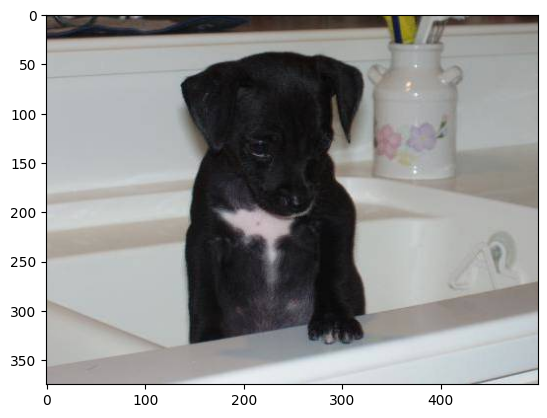

In [11]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

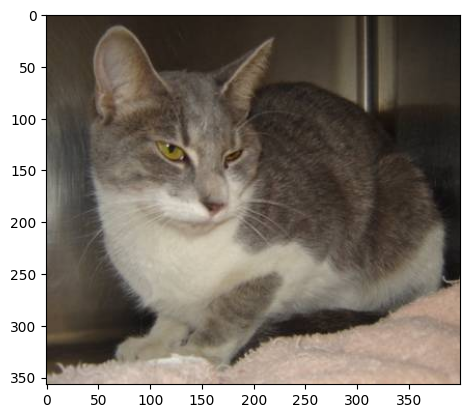

In [12]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
cat
cat
cat


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [15]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [17]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: ignored

In [18]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: ignored

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [19]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [20]:
print(filenames[0:5])
print(len(filenames))

['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg']
2000


In [21]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [22]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 968 1032]


Converting all the resized images to numpy arrays

In [43]:
import cv2
import glob

In [24]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [175 193 200]
   [174 194 199]
   [136 156 161]]

  [[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [174 192 199]
   [167 187 192]
   [127 147 152]]

  [[205 222 235]
   [205 222 235]
   [205 222 235]
   ...
   [173 191 198]
   [157 177 182]
   [115 135 140]]

  ...

  [[ 79  51  34]
   [ 79  51  34]
   [ 79  51  34]
   ...
   [ 87 100  98]
   [ 87 100  98]
   [ 90 103 101]]

  [[ 83  53  34]
   [ 81  54  34]
   [ 80  52  35]
   ...
   [ 86  99  97]
   [ 89 102 100]
   [ 95 108 106]]

  [[ 85  55  36]
   [ 84  54  35]
   [ 80  52  35]
   ...
   [ 84  97  95]
   [ 86  99  97]
   [ 94 107 105]]]


 [[[ 54  82  93]
   [ 46  73  83]
   [  4  29  39]
   ...
   [238 244 243]
   [244 250 249]
   [225 231 230]]

  [[ 62  90 101]
   [ 53  80  90]
   [  9  34  44]
   ...
   [224 232 231]
   [232 238 237]
   [240 248 247]]

  [[ 63  91 102]
   [ 55  82  92]
   [  9  34  44]
   ...
   [215 226 224]
   [220 228 227]
   [246 255

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [29]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [32]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
print(X_train_scaled)

[[[[0.75294118 0.70588235 0.65882353]
   [1.         0.99215686 0.9372549 ]
   [0.89019608 0.81176471 0.74509804]
   ...
   [0.31764706 0.48627451 0.30980392]
   [0.32941176 0.49019608 0.31372549]
   [0.29019608 0.44313725 0.2627451 ]]

  [[0.77647059 0.72941176 0.69019608]
   [1.         1.         0.94509804]
   [0.8745098  0.79607843 0.72941176]
   ...
   [0.17254902 0.32941176 0.16470588]
   [0.23529412 0.38431373 0.21960784]
   [0.35294118 0.49411765 0.32156863]]

  [[0.68627451 0.63529412 0.60392157]
   [1.         0.96078431 0.91372549]
   [0.89019608 0.80784314 0.74901961]
   ...
   [0.38039216 0.51372549 0.36862745]
   [0.31372549 0.44313725 0.29803922]
   [0.19215686 0.31372549 0.16078431]]

  ...

  [[0.21176471 0.34509804 0.18431373]
   [0.29803922 0.43137255 0.27058824]
   [0.28627451 0.41960784 0.25882353]
   ...
   [0.20784314 0.34117647 0.18431373]
   [0.29411765 0.42745098 0.26666667]
   [0.43921569 0.57254902 0.41176471]]

  [[0.36862745 0.50196078 0.34117647]
   [0.4

Building the Neural Network

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [35]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [36]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [38]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 57s 1s/step - loss: 0.1726 - acc: 0.9394
Epoch 2/5
50/50 [==============================] - 56s 1s/step - loss: 0.0693 - acc: 0.9781
Epoch 3/5
50/50 [==============================] - 49s 986ms/step - loss: 0.0532 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 50s 1s/step - loss: 0.0437 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 55s 1s/step - loss: 0.0347 - acc: 0.9919


In [39]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 969ms/step - loss: 0.0885 - acc: 0.9700
Test Loss = 0.08849916607141495
Test Accuracy = 0.9700000286102295


Predictive System

Path of the image to be predicted: /content/cat.jpg


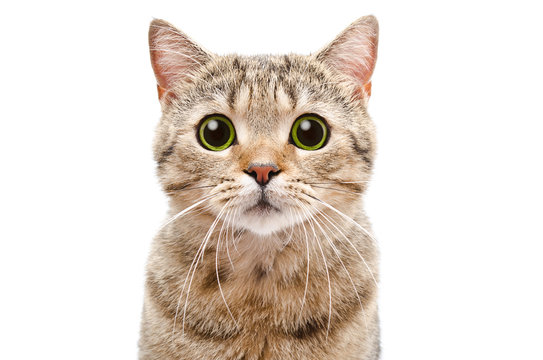

1/1 [==============================] - 1s 570ms/step
[[ 2.7803528 -2.8064303]]
0
The image represents a Cat


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


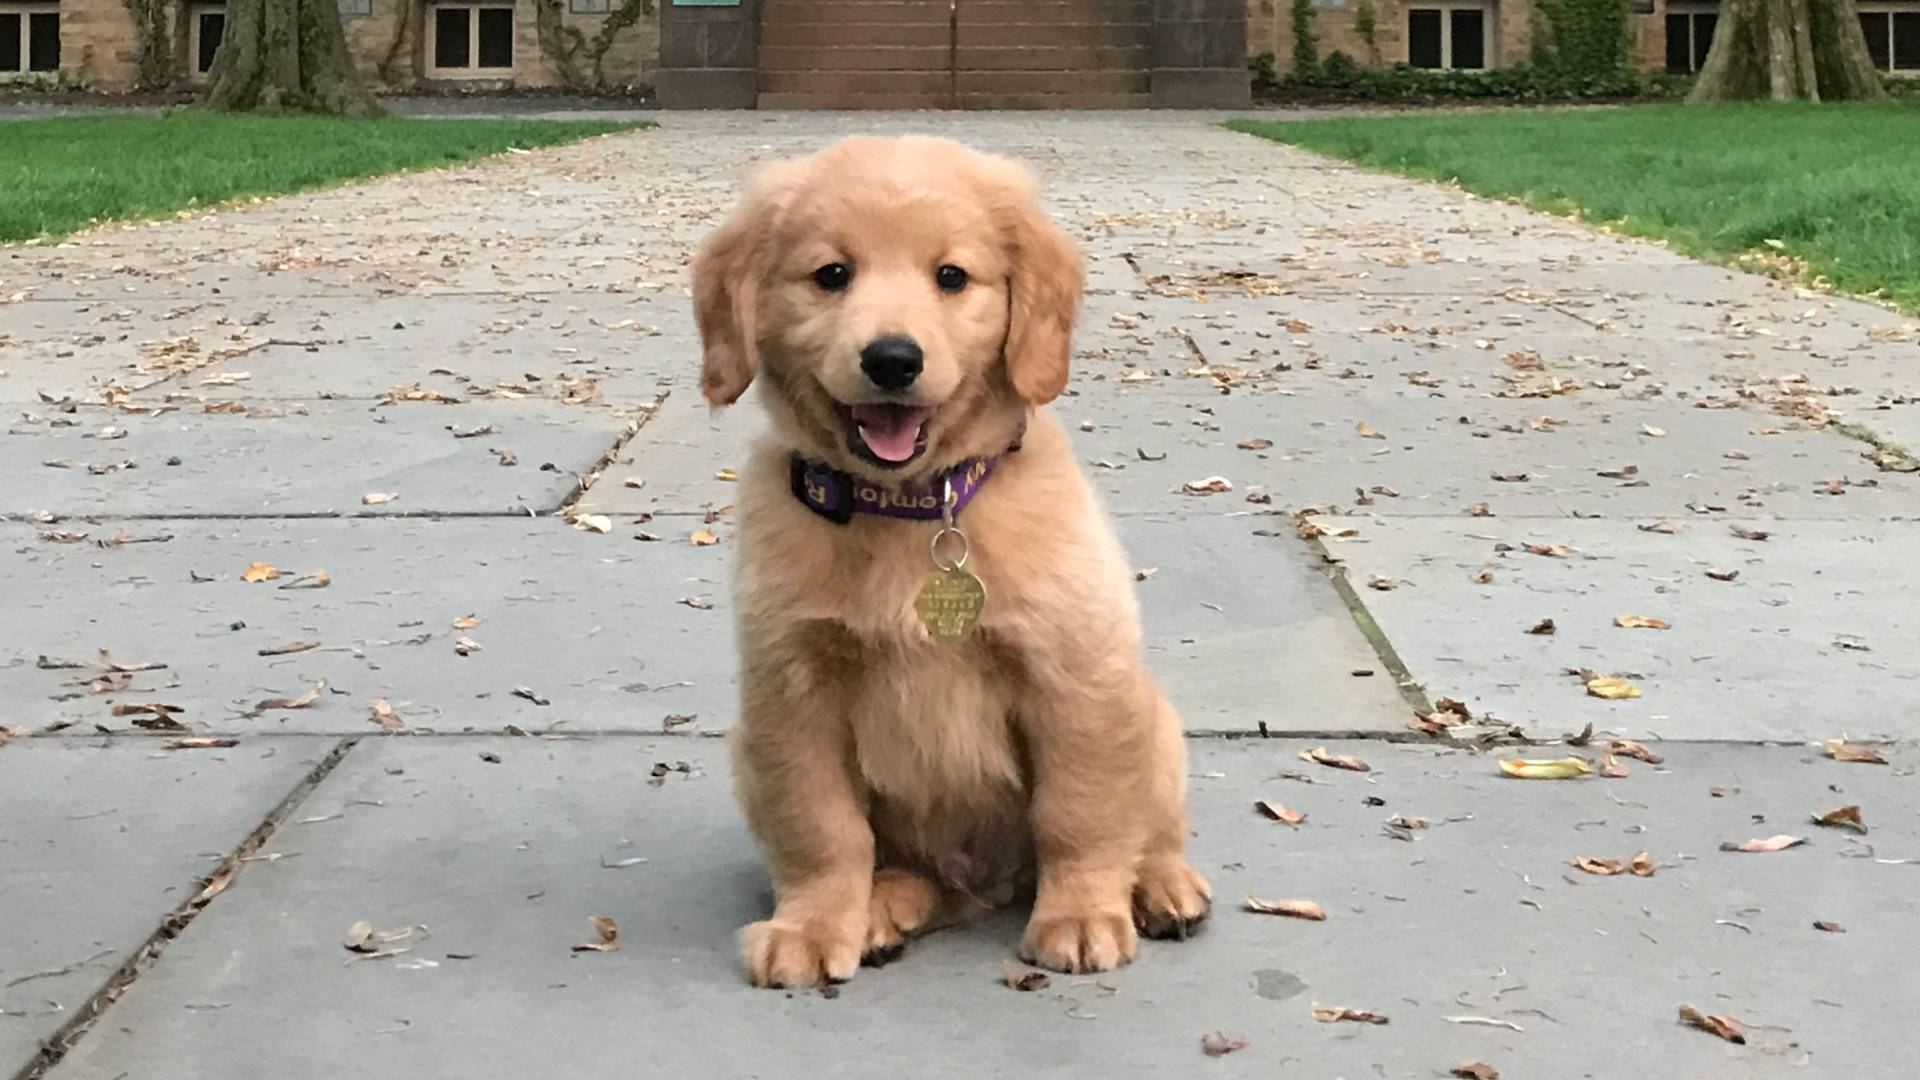

1/1 [==============================] - 0s 72ms/step
[[-3.3404305  3.5667167]]
1
The image represents a Dog


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')